# Missing Data

We need to deal with missing data. Most algorithms will not work if data is missing. 

As with many things in machine learning, there are no hard answers for how to treat missing data. Also, missing data could represent different situations. 

There are also various ways to handle missing data: 
* Remove any row with missing data
* Remove any column with missing data
* Inpute missing values
* Create an indicator column to signify data was missing

## Examining missing value 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_excel('titanic3.xls')

Because Python treats `True` and `False` as 0 and 1, respectively, we can use this trick in pandas to get percent of missing data:

In [3]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

To visualize patterns in the missing data, we can use `missinggo` library. This library is useful for viewing contiguous areas of missing data, which would indicate that the missing is not random. 
The `matrix` function includes a sparkline along the right side. Patterns here would also indicate nonrandom missing data. You may need to limit the number of samples to be able to see the patterns:

In [4]:
#! pip install missingno

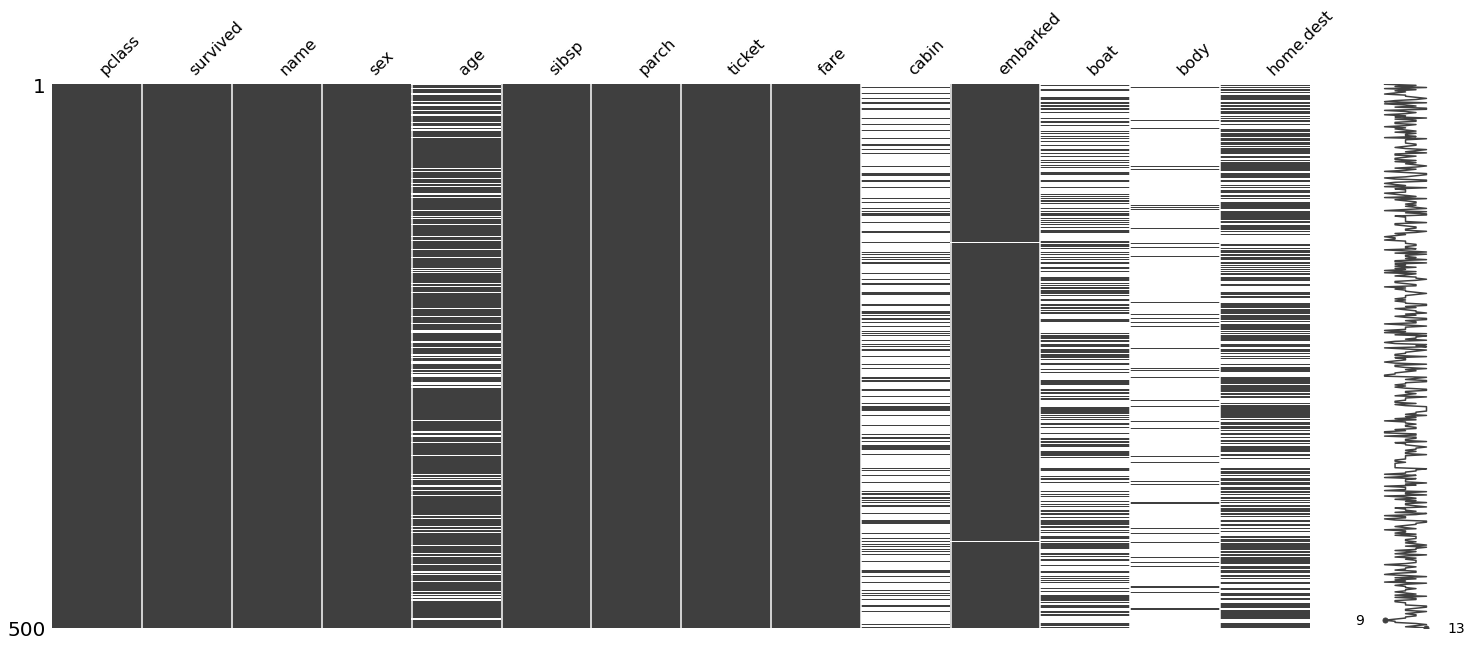

In [5]:
import missingno as msno
ax = msno.matrix(df.sample(500))
#ax.get_figure().savefig('msno.png')

We can also create a bar plot of missing data counts using pandas

In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

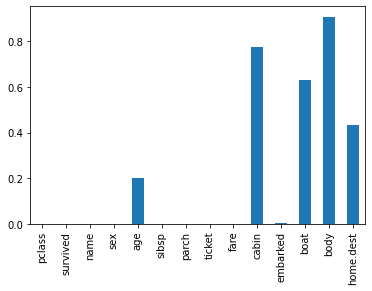

In [7]:
fig,ax = plt.subplots(figsize=(6,4))
(1*df.isnull().mean()).abs().plot.bar(ax=ax)
# fig.save('missing_data_barplot.png')

We can even create a heat map showing if there are correlations where data is missing.

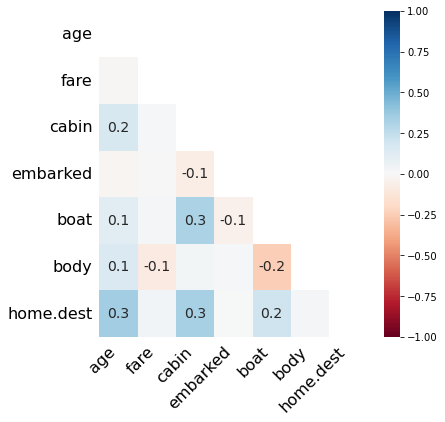

In [8]:
ax = msno.heatmap(df, figsize=(6,6))
# ax.get_figure().savefig('heat_map_corrmissdata.png')

We can create a dendogram showing the clustering of where data is missing. Leaves that are at the same level predict one another0s presence (empty or filled). The vertical arms are used to indicate how different clusters are. Short arms mean that branches are similar:

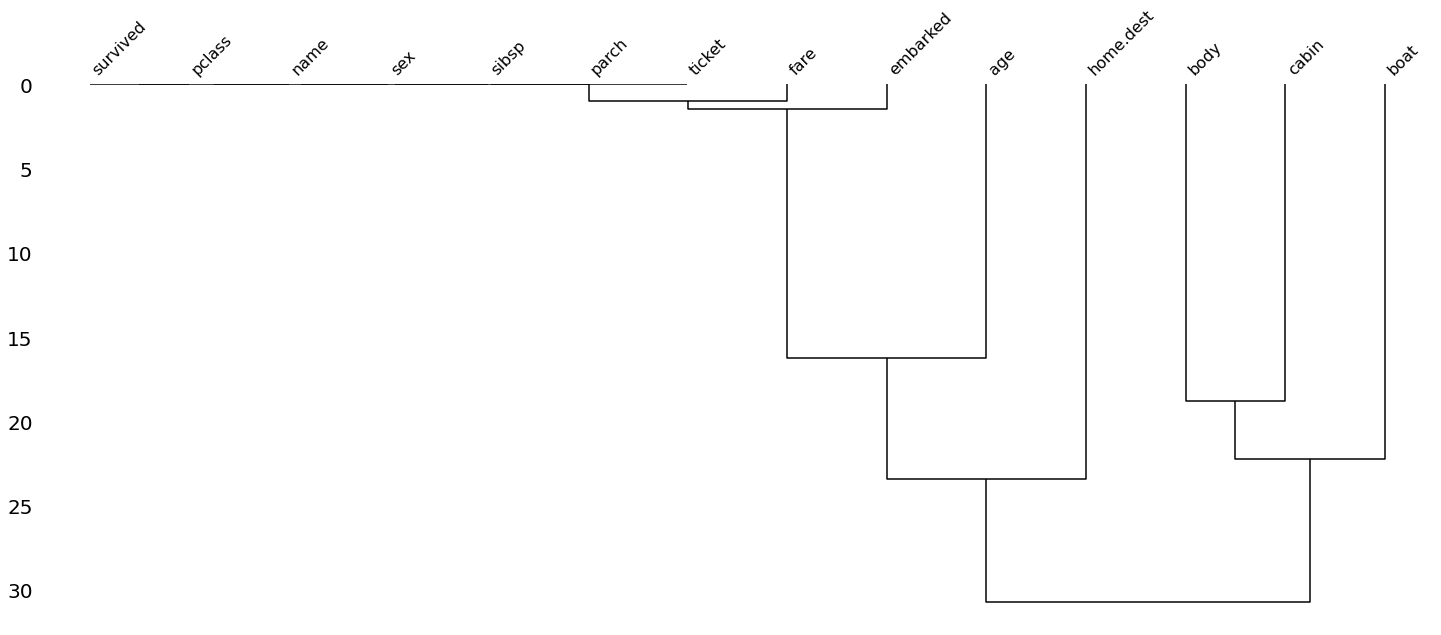

In [9]:
ax = msno.dendrogram(df)
# ax.get_figure().savefig('dendogram_missing_values.png')

## Dropping Missing Data

The pandas library can drop all rows with missing data, with the `dropna` method:

In [10]:
df1 = df.dropna()

To dorp columns, we can note what columns are missing and use the `.drop` method. We can pass in a list of column names or a single column name:

In [11]:
df1 = df.dropna(axis=1)

__Be careful about dropping data. This is usually a last resort option__

## Imputing Data

Once you have a tool for predicting data, you can use that to predict missing data. The general task of defining values fro missing values is called _imputatiton_. 

If you are imputing data, you will need to built up a pipeline and use the same imputation logic during model creation and  prediction time. The `SimpleImputer` class in scikit-learn will handle mean, median, and most frequent feature values. 

The default behavior is to calculate the mean:

In [12]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(
            include = 'number').columns
im = SimpleImputer()
imputed = im.fit_transform(df[num_cols])

Provide `strategy = 'median'` or `strategy = 'most_frequent'` to change the replaced value to median or most common, respectively. If you wish to fill with a constant value, say -1, use `strategy = 'constant'` in combination with `fill_value = -1`.

### Tip 

You can use the `.fillna` method in pandas to impute missing values as well. Make sure that you do not leak data though. 
If you are filling in with the mean value, make sure you use the same mean value during model creation and model prediction time. 

## Adding Indicator Columns

The lack of data in and of itself may provide some signal to a model. The pandas library can add a new column to indicate that a value was missing:

In [14]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper

df1 = df.assign(cabin_missing = add_indicator('cabin'))

In [15]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1
